# Step 1: Let's make a simple image first
- Creates a 400x300 pixel white image
- Draws 6 colored squares (3 primary colors, 3 mixed colors)
- shows you the image

In [ ]:

from PIL import Image, ImageDraw

# Make a blank white image
img = Image.new('RGB', (400, 300), color='white')
draw = ImageDraw.Draw(img)

# Draw some colored boxes so we can see what's what
draw.rectangle([(20, 20), (120, 120)], fill='red')     # Red box
draw.rectangle([(150, 20), (250, 120)], fill='green')  # Green box
draw.rectangle([(280, 20), (380, 120)], fill='blue')   # Blue box

# Draw some mixed color boxes too
draw.rectangle([(20, 150), (120, 250)], fill='yellow')   # Yellow (red+green)
draw.rectangle([(150, 150), (250, 250)], fill='cyan')    # Cyan (green+blue)
draw.rectangle([(280, 150), (380, 250)], fill='magenta') # Magenta (red+blue)

# Show our image
img.show()

# Step 2: Make it black & white
- convert('L') means "convert to Luminance" (fancy word for brightness)
- Takes all colors and averages them to make shades of gray
- You lose color info but keep brightness info

In [ ]:
# Take our colored image and make it grayscale
gray_img = img.convert('L')

# Show both side by side
img.show()      # Colored version
gray_img.show() # Black & white version

# Step 3: Split the colors apart
- Every colored image is made of 3 layers: Red, Green, Blue
- split() separates these layers
- Each layer shows how much of that color is in each pixel
- Brighter = more of that color in that spot

In [ ]:
# Split the image into its 3 color channels
red_channel, green_channel, blue_channel = img.split()

# Show each channel separately
red_channel.show()    # Shows just the red parts as grayscale
green_channel.show()  # Shows just the green parts
blue_channel.show()   # Shows just the blue parts

# Step 4: Put them back together
- You take the 3 separate layers
- Combine them exactly how they were
- Should look identical to the original
- It's like taking apart a sandwich and putting it back together

In [ ]:
# Put the channels back together
reconstructed = Image.merge('RGB', (red_channel, green_channel, blue_channel))

# Show the result
reconstructed.show()

# Step 5: Mess with the green channel
- Green squares become black (no green = no color there)
- Yellow squares become red (yellow = red+green, remove green = just red)
- Cyan squares become blue (cyan = green+blue, remove green = just blue)
- White areas become magenta (white = all colors, remove green = red+blue)

In [ ]:
# Create a totally black image (all zeros)
zero_green = Image.new('L', img.size, 0)

# Put the image back together but with NO green
no_green_img = Image.merge('RGB', (red_channel, zero_green, blue_channel))

# Show what happens without green
no_green_img.show()

# Step 6: Let's visualize everything

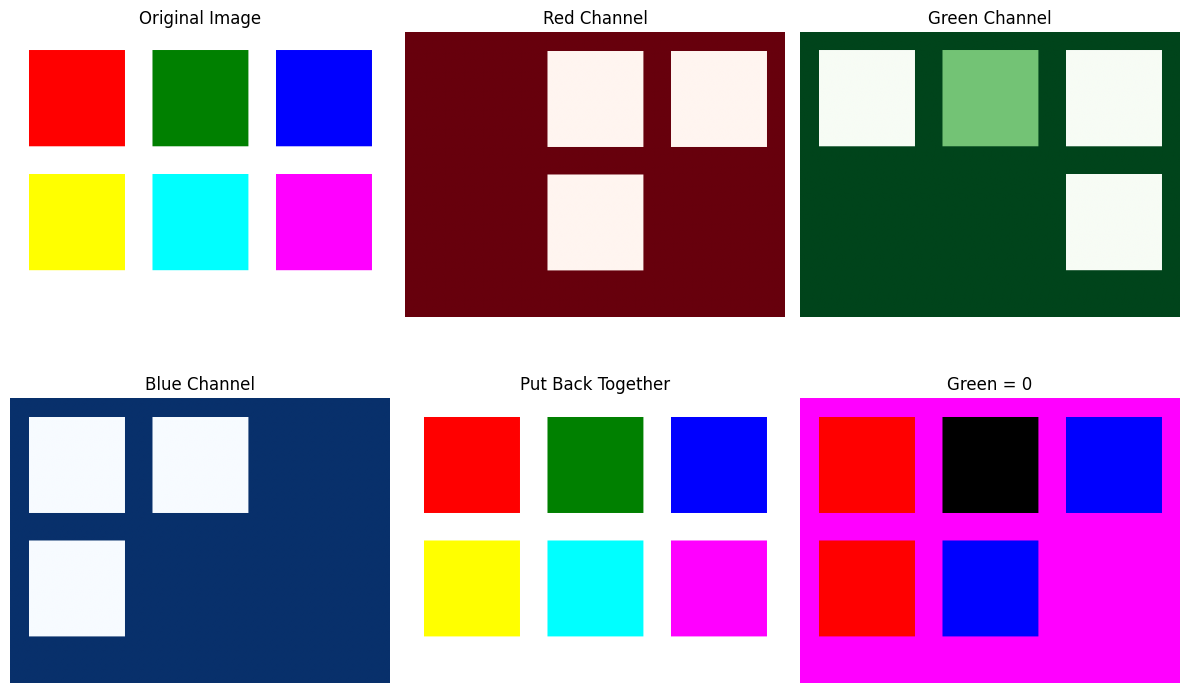

In [ ]:
import matplotlib.pyplot as plt

# Make a nice grid to show all our images
fig, axes = plt.subplots(2, 3, figsize=(12, 8))

# Top row: Original and channels
axes[0, 0].imshow(img)
axes[0, 0].set_title('Original Image')
axes[0, 0].axis('off')

axes[0, 1].imshow(red_channel, cmap='Reds')
axes[0, 1].set_title('Red Channel')
axes[0, 1].axis('off')

axes[0, 2].imshow(green_channel, cmap='Greens')
axes[0, 2].set_title('Green Channel')
axes[0, 2].axis('off')

# Bottom row: More channels and results
axes[1, 0].imshow(blue_channel, cmap='Blues')
axes[1, 0].set_title('Blue Channel')
axes[1, 0].axis('off')

axes[1, 1].imshow(reconstructed)
axes[1, 1].set_title('Put Back Together')
axes[1, 1].axis('off')

axes[1, 2].imshow(no_green_img)
axes[1, 2].set_title('Green = 0')
axes[1, 2].axis('off')

plt.tight_layout()
plt.show()

# Step 7: Try it with my own photo!


 STEP 7: UPLOAD YOUR IMAGE
------------------------------


Saving IMG-20251201-WA0028.jpg to IMG-20251201-WA0028.jpg


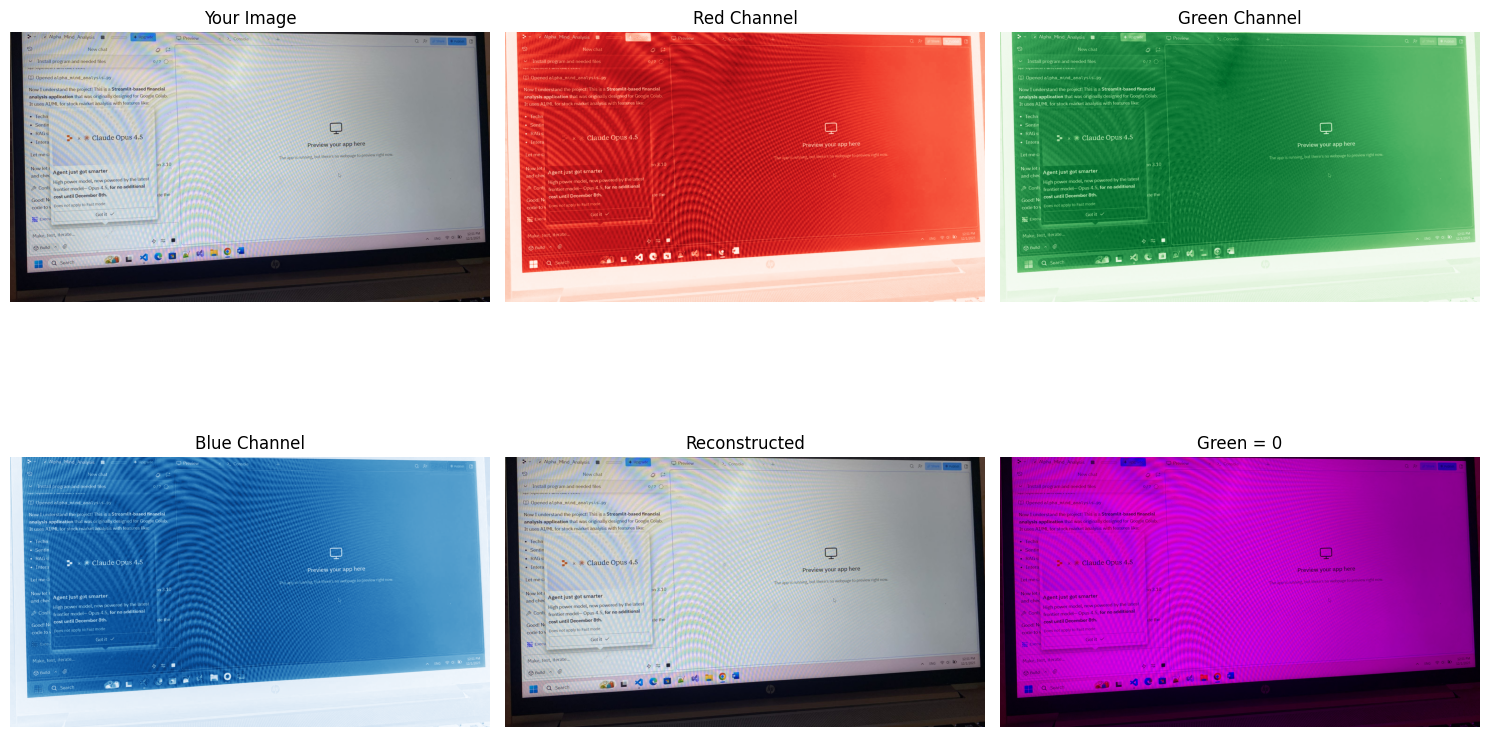

 Done! All steps applied to your uploaded image.


In [7]:
# =====================
# STEP 7: UPLOAD & PROCESS
# =====================

print("\n STEP 7: UPLOAD YOUR IMAGE")
print("-" * 30)

# 1. Upload image
from google.colab import files
import io

uploaded = files.upload()

# 2. Get the uploaded image
for file_name in uploaded.keys():
    your_img = Image.open(io.BytesIO(uploaded[file_name]))
    break

# 3. DO ALL THE SAME STEPS WITH YOUR IMAGE
# -----------------------------------------
# EVERYTHING BELOW IS IDENTICAL TO YOUR PREVIOUS CODE
# JUST USING 'your_img' INSTEAD OF 'img'

# Convert to grayscale
gray_img = your_img.convert('L')

# Split channels
r, g, b = your_img.split()

# Reconstruct
reconstructed = Image.merge('RGB', (r, g, b))

# Remove green
zero_green = Image.new('L', your_img.size, 0)
no_green = Image.merge('RGB', (r, zero_green, b))

# Display results
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

axes[0,0].imshow(your_img)
axes[0,0].set_title('Your Image')
axes[0,0].axis('off')

axes[0,1].imshow(r, cmap='Reds')
axes[0,1].set_title('Red Channel')
axes[0,1].axis('off')

axes[0,2].imshow(g, cmap='Greens')
axes[0,2].set_title('Green Channel')
axes[0,2].axis('off')

axes[1,0].imshow(b, cmap='Blues')
axes[1,0].set_title('Blue Channel')
axes[1,0].axis('off')

axes[1,1].imshow(reconstructed)
axes[1,1].set_title('Reconstructed')
axes[1,1].axis('off')

axes[1,2].imshow(no_green)
axes[1,2].set_title('Green = 0')
axes[1,2].axis('off')

plt.tight_layout()
plt.show()

print(" Done! All steps applied to your uploaded image.")